# Разработка предложений по удержанию клиентов сети фитнес-центров с использованием машинного обучения

**Цель проекта – уменьшить отток клиентов сети фитнес-центров.**

**Задачи проекта:**
1. создать модель, которая предсказывает вероятность оттока (на уровне следующего месяца) для каждого клиента;
2. выделить группы клиентов и проанализировать их поведение;
3. сформулировать предложения по удержанию клиентов на основе полученной информации.

Анализ поведения клиентов проведен с использованием общей информации о них, а также данных об их поведении при использовании услуг фитнес-центра.

Факт оттока определен как отсутствие посещений центра в течении месяца.

Анализ данных о клиентах произведен с использованием машинного обучения (алгоритмы обучения с учителем и без учителя). 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы-и-предложения-по-удержанию-клиентов" data-toc-modified-id="Выводы-и-предложения-по-удержанию-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и предложения по удержанию клиентов</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import scipy

from sklearn.experimental import enable_halving_search_cv
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                            auc, roc_curve, PrecisionRecallDisplay, \
                            silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

pd.set_option('display.float_format', '{:,.3f}'.format)

import warnings
warnings.filterwarnings('ignore')

RAND = 7

## Загрузка данных

In [2]:
df = pd.read_csv('data/gym_churn.csv')

In [3]:
df.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                        14.227                  5.000   
1             1   31                       113.203                 12.000   
2             0   28                       129.448                  1.000   
3             1   33                        62.670                 12.000   
4             0   26                       198.362                  1.000   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                      0.020                              0.000   
1         7                      1.923                              1.910   
2         2                      1.859                              1.737   
3         2                      3.206                              3.357   
4         3                      1.114                              1.120   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [4]:
df.columns = df.columns.str.lower().str.strip()

Набор данных включает следующие поля:

- `churn` — факт оттока в текущем месяце;
- Данные клиента за предыдущий до проверки факта оттока месяц:
    - `gender` — пол;
    - `near_location` — проживание или работа в районе, где находится фитнес-центр;
    - `partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - `promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - `phone` — наличие контактного телефона;
    - `age` — возраст;
    - `lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - `contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    - `month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
    - `group_visits` — факт посещения групповых занятий;
    - `avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
    - `avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
    - `avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Отметим, что кодировка столбца с информацией о поле клиента непонятна и требует внешнего разъяснения. Также непонятно в какой валюте дана выручка от других услуг фитнес-центра. Будем считать, что это российские рубли.

In [5]:
print(f'Количество наблюдений: {df.shape[0]}, количество признаков: {df.shape[1]}.')

Количество наблюдений: 4000, количество признаков: 14.


Не смотря на то, что данных у нас немного, количество наблюдений все же превосходит минимально необходимое, рассчитанное как число признаков умноженное на 10 (в нашем случае минимальная выборка составляет 140 наблюдений).

In [6]:
df.dtypes

gender                                 int64
near_location                          int64
partner                                int64
promo_friends                          int64
phone                                  int64
contract_period                        int64
group_visits                           int64
age                                    int64
avg_additional_charges_total         float64
month_to_end_contract                float64
lifetime                               int64
avg_class_frequency_total            float64
avg_class_frequency_current_month    float64
churn                                  int64
dtype: object

Все данные представлены численными типами данных (целочисленный и вещественный типы). Категориальных признаков кроме бинарных у нас нет, а они уже переведены в целочисленный тип данных. Данные о сроке до окончания текущего действующего абонемента (в месяцах) лучше перевести в целочисленный тип данных.

In [7]:
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [8]:
df.duplicated().sum()

0

Пропусков и полностью дублирующихся строк в данных нет.

In [9]:
df.describe()

gender  near_location   partner  promo_friends     phone  \
count 4,000.000      4,000.000 4,000.000      4,000.000 4,000.000   
mean      0.510          0.845     0.487          0.308     0.903   
std       0.500          0.362     0.500          0.462     0.295   
min       0.000          0.000     0.000          0.000     0.000   
25%       0.000          1.000     0.000          0.000     1.000   
50%       1.000          1.000     0.000          0.000     1.000   
75%       1.000          1.000     1.000          1.000     1.000   
max       1.000          1.000     1.000          1.000     1.000   

       contract_period  group_visits       age  avg_additional_charges_total  \
count        4,000.000     4,000.000 4,000.000                     4,000.000   
mean             4.681         0.412    29.184                       146.944   
std              4.550         0.492     3.258                        96.356   
min              1.000         0.000    18.000                         0.148   
25%              1.000         0.000    27.000                        68.869   
50%              1.000         0.000    29.000                       136.220   
75%              6.000         1.000    31.000                       210.950   
max             12.000         1.000    41.000                       552.591   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
count              4,000.000 4,000.000                  4,000.000   
mean                   4.323     3.725                      1.879   
std                    4.191     3.749                      0.972   
min                    1.000     0.000                      0.000   
25%                    1.000     1.000                      1.181   
50%                    1.000     3.000                      1.833   
75%                    6.000     5.000                      2.536   
max                   12.000    31.000                      6.024   

       avg_class_frequency_current_month     churn  
count                          4,000.000 4,000.000  
mean                               1.767     0.265  
std                                1.053     0.442  
min                                0.000     0.000  
25%                                0.963     0.000  
50%                                1.720     0.000  
75%                                2.510     1.000  
max                                6.147     1.000

Видим, что для некоторых бинарных признаков классы распределены равномерно (`gender`, `partner`), для других бинарных признаков характерно преобладание одного класса. Минимальные и максимальные значения признаков соответствуют природе данных. 

In [10]:
df.nunique()

gender                                  2
near_location                           2
partner                                 2
promo_friends                           2
phone                                   2
contract_period                         3
group_visits                            2
age                                    23
avg_additional_charges_total         4000
month_to_end_contract                  12
lifetime                               29
avg_class_frequency_total            3913
avg_class_frequency_current_month    3820
churn                                   2
dtype: int64

Количество уникальных значений в каждом столбце также соответствует характеру признаков.

In [11]:
df['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

В фитнес-центре существует три типа контрактов: на 1 месяц, полгода и на год.

Преобразуем тип данных признака с информацией о сроке до окончания текущего действующего абонемента (в месяцах).

In [12]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

### Вывод

Загруженные данные содержат информацию о 4 тысячах клиентов фитнес-центра. Данные не содержат пропусков, выбросов и дубликатов. Типы данных, диапазон значений и количество уникальных значений соответствуют предметной области и природе признаков. Данные не требуют предобработки и готовы к дальнейшему анализу.

## EDA

В рамках разведочного анализа данных более подробно изучим данные о клиентах, а также проверим следующие предположения:
- проживающие или работающие в районе, где находится фитнес-центр реже перестают пользоваться услугами;
- клиенты с высоким lifetime реже уходят (постоянные клиенты);
- клиенты с более долгосрочным контрактом реже уходят;
- чем меньше срок до окончания контракта тем больше вероятность, что клиент уйдет;
- посетившие групповые занятия клиенты уходят реже;
- клиенты с более высокой средней частотой посещений в неделю за все время с начала действия абонемента реже уходят;
- средняя частота посещений в неделю за предыдущий месяц обратно пропорциональна вероятности ухода;
- клиенты с более высокой суммарной выручкой от других услуг фитнес-центра уходят реже.

**Целевая переменная**

Целевая переменная – факт оттока. Клиент считается ушедшим, если в течении последнего месяца он не пользовался услугами центра. Посмотрим на распределение данной величины.

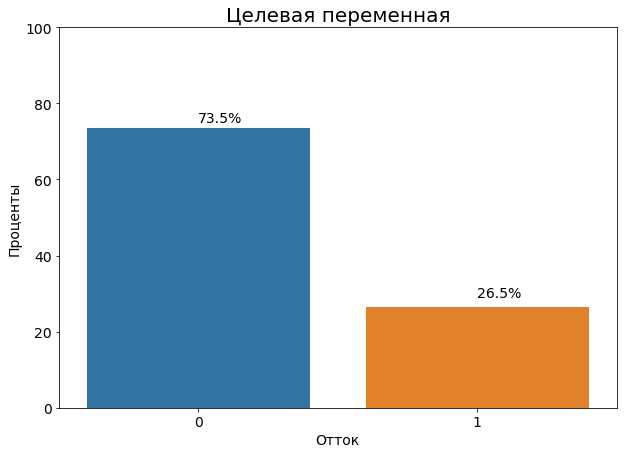

In [13]:
target_percent = df['churn']\
                    .value_counts(normalize=True)\
                    .mul(100)\
                    .rename('percent')\
                    .reset_index()

plt.figure(figsize = (10, 7))
ax = sns.barplot(x='index', y='percent', data=target_percent)
ax.set(ylim = (0,100))
ax.text(0, 75, '{:.1f}%'.format(float(target_percent.query('index == 0')['percent'])), fontsize=14)
ax.text(1, 29, '{:.1f}%'.format(float(target_percent.query('index == 1')['percent'])), fontsize=14)

plt.title('Целевая переменная', fontsize=20)

plt.xlabel('Отток', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Мы имеем дело с несбалансированными классами – доля ушедших клиентов от общего количества клиентов составляет 26.5%.

Изучим распределения имеющихся признаков. 

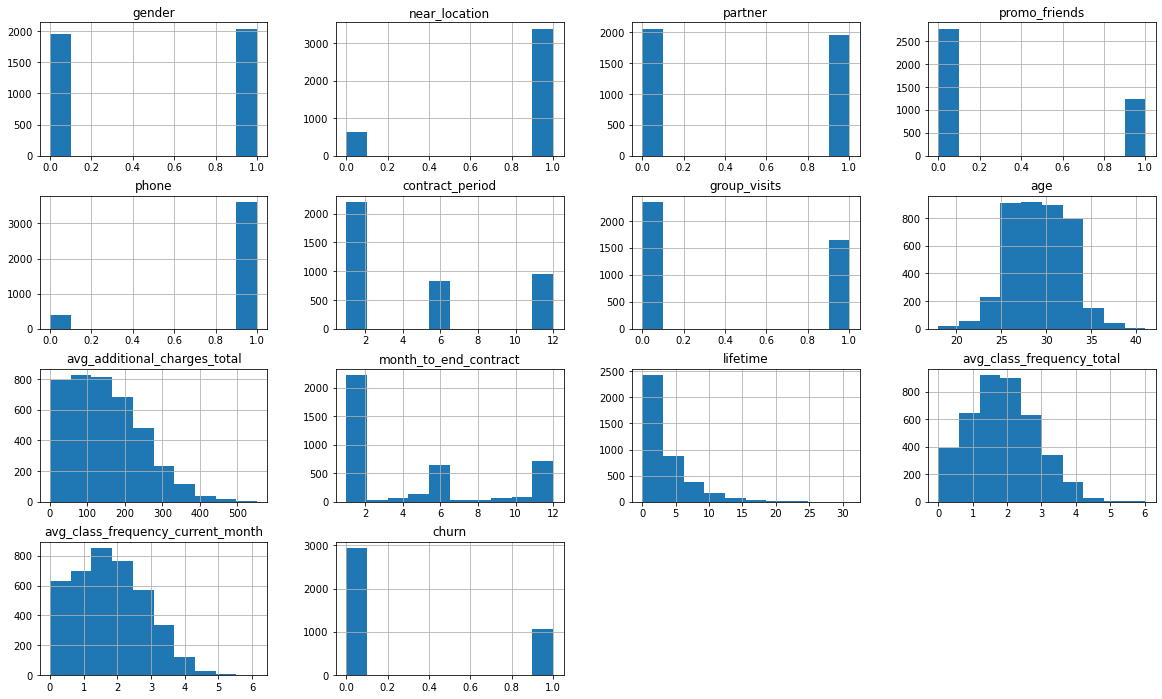

In [14]:
df[df.columns].hist(figsize=(20,12));

Построенные графики позволяют выделить несколько групп среди переменных относительно формы их распределения:
- `age`: распределение приближается к нормальному;
- `avg_class_frequency_total`, `avg_class_frequency_current_month`, `avg_additional_charges_total`, `lifetime`: распределение величин смещено вправо. Возможно, эти распределения близки к распределению Пуассона;
- `contract_period` и `month_to_end_contract`: распределение дискретной величины, имеем несколько классов с преобладанием класса «1 месяц»;
- `churn`, `group_visits`, `near_location`, `phone`, `promo_friends`: распределение бинарной величины с перевесом одного класса над другим;
- `gender`, `partner`: аналогичное предыдущему распределению с той лишь разницей, что классы распределены примерно поровну между клиентами.

Далее изучим признаки в зависимости от факта оттока.

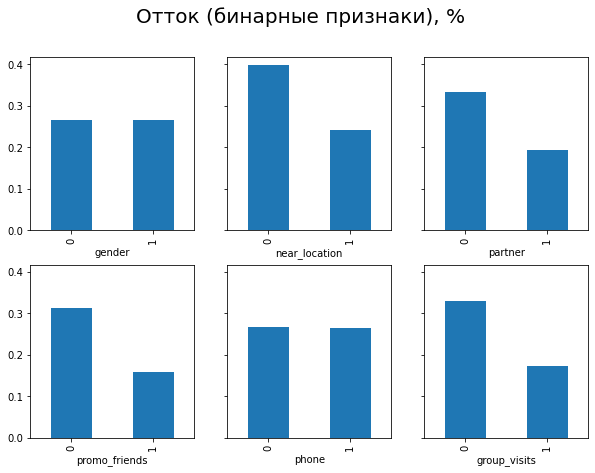

In [15]:
fig, ax = plt.subplots(2, 3, sharey=True)
pd.crosstab(df['churn'], df['gender'], normalize='columns').iloc[1, :].plot(kind='bar', ax = ax[0, 0], figsize = (10, 7))
pd.crosstab(df['churn'], df['near_location'], normalize='columns').iloc[1, :].plot(kind='bar', ax = ax[0, 1], figsize = (10, 7))
pd.crosstab(df['churn'], df['partner'], normalize='columns').iloc[1, :].plot(kind='bar', ax = ax[0, 2], figsize = (10, 7))
pd.crosstab(df['churn'], df['promo_friends'], normalize='columns').iloc[1, :].plot(kind='bar', ax = ax[1, 0], figsize = (10, 7))
pd.crosstab(df['churn'], df['phone'], normalize='columns').iloc[1, :].plot(kind='bar', ax = ax[1, 1], figsize = (10, 7))
pd.crosstab(df['churn'], df['group_visits'], normalize='columns').iloc[1, :].plot(kind='bar', ax = ax[1, 2], figsize = (10, 7))
fig.suptitle('Отток (бинарные признаки), %', fontsize=20);

На основе графиков можно сделать следующие предположения:
- пол и наличие контактного телефона никак не связано с оттоком,
- проживание (работа) в районе фитнес-центра, работа в компании партнера, запись в рамках акции «приведи друга» и посещение групповых занятий снижают вероятность оттока.

Далее рассмотрим медианные значения показателей по классам целевой переменой и построим соответствующие графики.

In [16]:
non_binar_features = ['age', 'contract_period', 'lifetime', 'month_to_end_contract',
                      'avg_additional_charges_total', 'avg_class_frequency_total', 
                      'avg_class_frequency_current_month']

df.groupby('churn', as_index=False)[non_binar_features].median()

churn    age  contract_period  lifetime  month_to_end_contract  \
0      0 30.000            6.000     4.000                  6.000   
1      1 27.000            1.000     1.000                  1.000   

   avg_additional_charges_total  avg_class_frequency_total  \
0                       149.881                      2.043   
1                       103.815                      1.491   

   avg_class_frequency_current_month  
0                              2.047  
1                              0.979

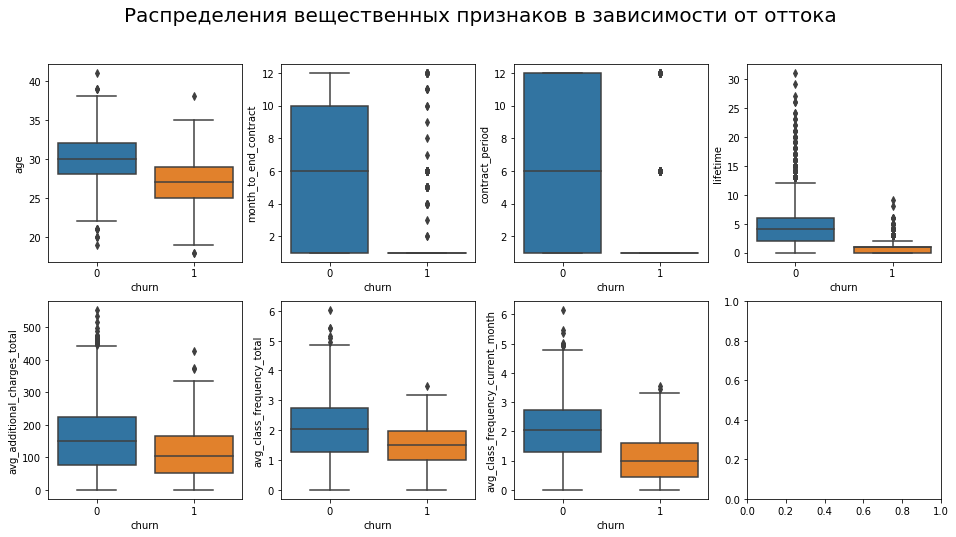

In [17]:
fig, ax = plt.subplots(2, 4, figsize=(16,8))

sns.boxplot(y=df['age'], x=df['churn'], ax = ax[0, 0])
sns.boxplot(y=df['month_to_end_contract'], x=df['churn'], ax = ax[0, 1])
sns.boxplot(y=df['contract_period'], x=df['churn'], ax = ax[0, 2])
sns.boxplot(y=df['lifetime'], x=df['churn'], ax = ax[0, 3])
sns.boxplot(y=df['avg_additional_charges_total'], x=df['churn'], ax = ax[1, 0])
sns.boxplot(y=df['avg_class_frequency_total'], x=df['churn'], ax = ax[1, 1])
sns.boxplot(y=df['avg_class_frequency_current_month'], x=df['churn'], ax = ax[1, 2])

fig.suptitle('Распределения вещественных признаков в зависимости от оттока', fontsize=20)

plt.show();

Графики указывают, что медиана по всем рассматриваемым величинам выше у лояльных пользователей. Отметим, что абсолютное большинство ушедших клиентов имели контракты длительностью в 1 месяц или срок до окончания текущего действующего абонемента составлял 1 месяц.

Построим матрицу корреляций вещественных признаков. 

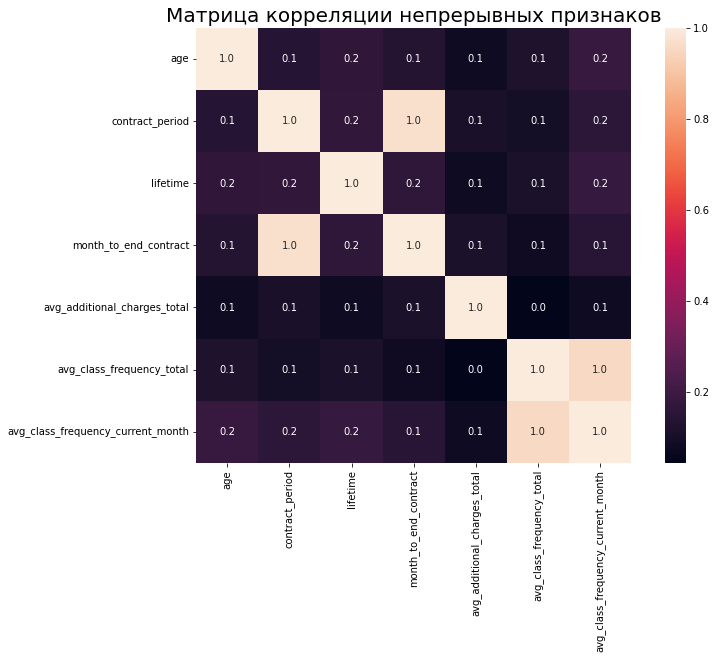

In [18]:
plt.figure(figsize = (12, 8))
plt.title('Матрица корреляции непрерывных признаков', fontsize=20)
sns.heatmap(df[non_binar_features].corr(), annot = True, square=True, fmt='.1f');

Построенная матрица корреляций указывает на то, что:
- наблюдается тесная связь между длительностью контракта и сроком до его окончания (объясняется, по всей видимости, преобладанием контрактов длительностью в 1 месяц);
- наблюдается тесная связь между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц (т.е. интенсивность занятий как правило не меняется).
- в остальном между признаками не наблюдается корреляций.

Отметим, что мы не будем удалять из датасета сильно скоррелированные признаки поскольку:
- в алгоритм логистической регрессии встроен механизм регуляризации, причем его вид (L1 или L2) зависит от solver-a;
- основанные на решающих деревьях алгоритмы устойчивы к сильно скоррелированным данным ([источник](https://medium.com/data-design/ensembles-of-tree-based-models-why-correlated-features-do-not-trip-them-and-why-na-matters-7658f4752e1b)).

Эти алгоритмы мы будем использовать далее в рамках решения задачи классификации. 

Дополнительно построим t-SNE представление наших данных.

In [19]:
X = df.drop(columns='churn')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_jobs=-1, random_state=RAND)
tsne_representation = tsne.fit_transform(X_scaled)

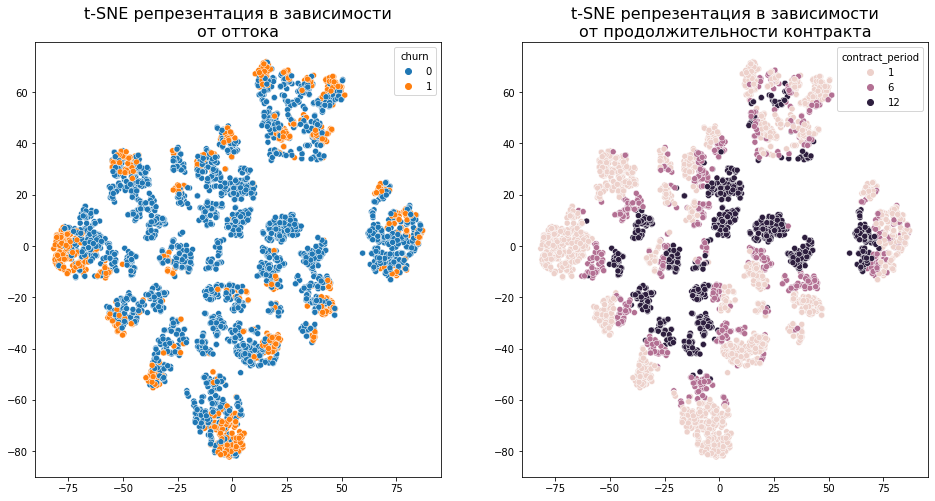

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

sns.scatterplot(tsne_representation[:, 0], tsne_representation[:, 1],
                hue=df['churn'], ax=ax[0]);
ax[0].set_title(r't-SNE репрезентация в зависимости' '\n' r'от оттока', fontsize=16)

sns.scatterplot(tsne_representation[:, 0], tsne_representation[:, 1],
                hue=df['contract_period'], ax=ax[1], legend='full')
ax[1].set_title(r't-SNE репрезентация в зависимости' '\n' r'от продолжительности контракта', fontsize=16);

Видим, что ушедшие клиенты сконцентрированы по внешним краям репрезентации. В то же время, клиенты с краткосрочными договорами также оказались на внешнем крае, а в середине репрезентации размещаются клиенты с долгосрочными договорами. Сравнение с показателем срока до окончания контракта примерно такое же. Сравнения с другими показателями не дали однозначных результатов.

### Вывод

В рамках разведочного анализа данных мы выяснили, что значения практически всех показателей выше у лояльных пользователей. Исключением являются пол и наличие контактного телефона – доли позитивных классов среди лояльных ушедших клиентов примерно одинаковы долям с нулевым классом.

Также мы выяснили, что за исключением двух пар признаков данные не имеют корреляции. Признаки с сильной корреляцией оставлены, т.к. алгоритмы, которые мы будем далее использовать, устойчивы к таким данным.

## Обучение моделей

Первой задачей нашего проекта является разработка модели, предсказывающей отток клиентов на уровне следующего месяца. Научившись определять клиентов, которые вероятнее всего в следующем месяце уйдут в отток, мы сможем оказать влияние на показатель удержания аудитории.

Данная задача является задачей бинарной классификации, которая может быть решена с использованием моделей машинного обучения с учителем. 

Чтобы найти наиболее эффективную модель мы попробуем решить нашу задачу с использованием следующих моделей:
1. логистическая регрессия
2. дерево решений
3. случайный лес
4. градиентный бустинг.

В каждом из 4 случаев мы будем поступать одинаково:
- построим baseline модель и выведем ее метрики качества на тестовой выборке,
- найдем оптимальные гиперпараметры модели и оценим качество модели на тестовой выборке.

После построения 8 моделей (для каждой baseline и улучшенный вариант) сравним метрики всех моделей.

Отметим, что с одной стороны, нам важна метрика precision, т.к. мы хотим как можно точно определять клиентов, которые потенциально уйдут в отток, чтобы не тратить впустую ресурсы на удержание клиентов, которые и так останутся. С другой стороны, нам также важна метрика recall, т.к. если мы будем очень точно определять отток, но будем находить лишь небольшую часть таких клиентов, охват наших действий по удержанию клиентов будет весьма ограниченным. Поэтому в качестве ключевой метрики оценки качества моделей будем использовать f1, однако на precision и recall будем обращать внимание. При поиске оптимальных параметров будем использовать метрику ROC AUC, т.к. поиск по этой метрике дает наилучший конечный результат.

Разделим данные на обучающую и вариационную воборки. Создадим функции для выведения отчета о метриках качества модели и добавления метрик качества модели в общую таблицу для всех моделей.

In [21]:
X = df.drop(columns='churn')
y = df['churn']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND)

In [23]:
def classification_report(y_test, y_pred, y_prob, model_name):
    print('\033[1m' + model_name + ':' + '\033[0m')
    print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
    print('F1_score: {:.3f}'.format(f1_score(y_test, y_pred)))
    print('ROC_AUC_score: {:.3f}'.format(roc_auc_score(y_test, y_prob)))
    print()
    print(sklearn.metrics.classification_report(y_test, y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    ax[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlabel('False Positive Rate', fontsize=12)
    ax[0].set_ylabel('True Positive Rate', fontsize=12)
    ax[0].legend(loc='lower right')
    ax[0].set_title(model_name + ' ROC AUC = %0.3f' % roc_auc, fontsize=14)
    
    PrecisionRecallDisplay.from_predictions(y_test, y_prob, name="Baseline linear regression", ax=ax[1])
    ax[1].set_title(model_name + ': Precision Recall visualization', fontsize=14)
    
    plt.show();

In [24]:
def add_to_metrics(model_name, y_test, y_pred, y_prob):
    metrics[model_name] = [accuracy_score(y_test, y_pred),
                           precision_score(y_test, y_pred),
                           recall_score(y_test, y_pred),
                           f1_score(y_test, y_pred),
                           roc_auc_score(y_test, y_prob)]

In [25]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

### Logistic Regression

**Baseline**

In [26]:
lr = LogisticRegression(class_weight = 'balanced', random_state=RAND, n_jobs=-1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

Baseline linear regression:
Accuracy: 0.892
Precision: 0.759
Recall: 0.890
F1_score: 0.819
ROC_AUC_score: 0.964

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       581
           1       0.76      0.89      0.82       219

    accuracy                           0.89       800
   macro avg       0.86      0.89      0.87       800
weighted avg       0.90      0.89      0.89       800



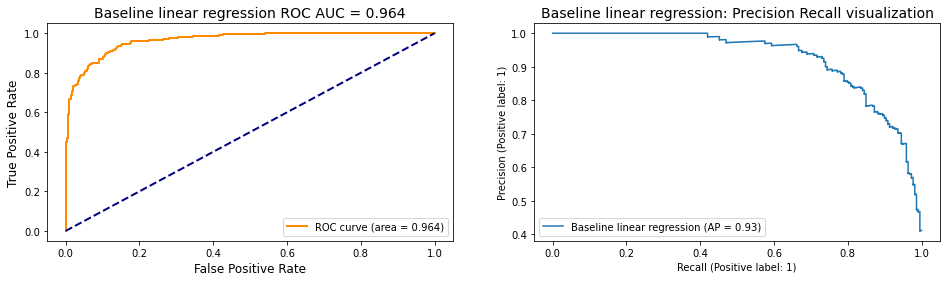

In [27]:
classification_report(y_test=y_test, y_pred=y_pred_lr, y_prob=y_prob_lr, model_name='Baseline linear regression')

In [28]:
add_to_metrics(model_name='baseline_lr', y_test=y_test, y_pred=y_pred_lr, y_prob=y_prob_lr)

Baseline модель логистической регрессии имеет явные проблемы с точностью определения позитивного класса.

**Подбор гиперпараметров**

In [29]:
# param_grid = {
    # 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    # 'C': [0.01, 0.05, 0.07, 0.1, 0.03, 0.5, 0.07, 1, 10, 100, 500, 1000],
    # 'penalty': ['l1', 'l2', 'elasticnet'],
    # 'max_iter': np.arange(100, 500, 100)   
# }

# lr = LogisticRegression(class_weight = 'balanced', random_state=RAND, n_jobs=-1)
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RAND)
# grid_cv = GridSearchCV(estimator=lr,
                       # param_grid=param_grid,
                       # scoring='roc_auc',
                       # cv=cv,
                       # n_jobs=-1,
                       # verbose=3)

In [30]:
# %%time
# grid_cv.fit(X_train, y_train)

In [31]:
# print(grid_cv.best_score_)
# print(grid_cv.best_params_)

In [32]:
best_params = {'C': 0.5, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [33]:
lr_grid = LogisticRegression(**best_params, class_weight = 'balanced', random_state=RAND)
lr_grid.fit(X_train, y_train)
y_pred_lr_grid = lr_grid.predict(X_test)
y_prob_lr_grid = lr_grid.predict_proba(X_test)[:,1]

Grid linear regression:
Accuracy: 0.917
Precision: 0.800
Recall: 0.932
F1_score: 0.861
ROC_AUC_score: 0.976

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       581
           1       0.80      0.93      0.86       219

    accuracy                           0.92       800
   macro avg       0.89      0.92      0.90       800
weighted avg       0.93      0.92      0.92       800



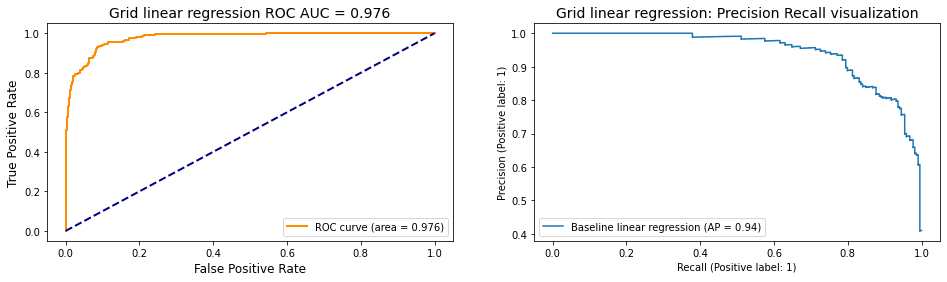

In [34]:
classification_report(y_test=y_test, y_pred=y_pred_lr_grid, y_prob=y_prob_lr_grid, model_name='Grid linear regression')

In [35]:
add_to_metrics(model_name='grid_lr', y_test=y_test, y_pred=y_pred_lr_grid, y_prob=y_prob_lr_grid)

Нам удалось повысить все метрики качества модели логистической регрессии. Однако слабой стороной модели остается недостаточно высокая точность определения позитивного класса.

### Decision Tree

**Baseline**

In [36]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=RAND)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

Baseline decision tree:
Accuracy: 0.892
Precision: 0.824
Recall: 0.772
F1_score: 0.797
ROC_AUC_score: 0.855

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       581
           1       0.82      0.77      0.80       219

    accuracy                           0.89       800
   macro avg       0.87      0.85      0.86       800
weighted avg       0.89      0.89      0.89       800



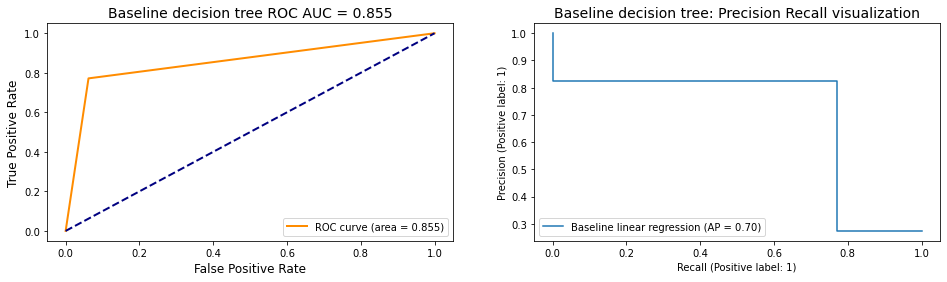

In [37]:
classification_report(y_test=y_test, y_pred=y_pred_dt, y_prob=y_prob_dt, model_name='Baseline decision tree')

In [38]:
add_to_metrics(model_name='baseline_dt', y_test=y_test, y_pred=y_pred_dt, y_prob=y_prob_dt)

Базовый вариант решающего дерева имеет явные проблемы с точностью и полнотой определения позитивного класса. В целом у модели недостаточно высокое значение метрики recall. 

**Подбор гиперпараметров**

In [39]:
# param_grid = {
    # 'criterion': ['gini', 'entropy'],
    # 'max_depth': list(range(4, 15)),
    # 'max_features': list(range(2, X_train.shape[1]+1)),
# }

# dt = DecisionTreeClassifier(class_weight='balanced', random_state=RAND)
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RAND)
# grid_cv = GridSearchCV(estimator=dt,
                       # param_grid=param_grid,
                       # scoring='roc_auc',
                       # cv=cv,
                       # n_jobs=-1,
                       # verbose=3)

In [40]:
# %%time
# grid_cv.fit(X_train, y_train)

In [41]:
# print(grid_cv.best_score_)
# print(grid_cv.best_params_)

In [42]:
best_params = {'criterion': 'entropy', 'max_depth': 5, 'max_features': 12}

In [43]:
dt_grid = DecisionTreeClassifier(**best_params, class_weight = 'balanced', random_state=RAND)
dt_grid.fit(X_train, y_train)
y_pred_dt_grid = dt_grid.predict(X_test)
y_prob_dt_grid = dt_grid.predict_proba(X_test)[:,1]

Grid decision tree:
Accuracy: 0.875
Precision: 0.716
Recall: 0.900
F1_score: 0.798
ROC_AUC_score: 0.942

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       581
           1       0.72      0.90      0.80       219

    accuracy                           0.88       800
   macro avg       0.84      0.88      0.85       800
weighted avg       0.89      0.88      0.88       800



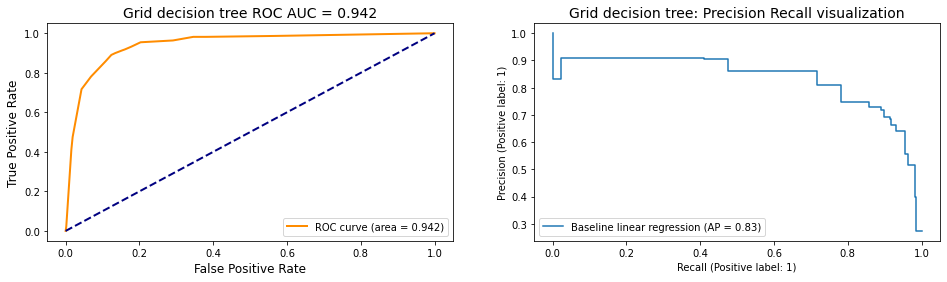

In [44]:
classification_report(y_test=y_test, y_pred=y_pred_dt_grid, y_prob=y_prob_dt_grid, model_name='Grid decision tree')

In [45]:
add_to_metrics(model_name='grid_dt', y_test=y_test, y_pred=y_pred_dt_grid, y_prob=y_prob_dt_grid)

Подбор параметров не дал сколь значимых результатов: значительно повысив recall мы снизили precision. В результате f1 практически не изменился.

### Random Forest

**Baseline**

In [46]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=RAND)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

Baseline random forest:
Accuracy: 0.921
Precision: 0.882
Recall: 0.822
F1_score: 0.851
ROC_AUC_score: 0.973

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       581
           1       0.88      0.82      0.85       219

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800



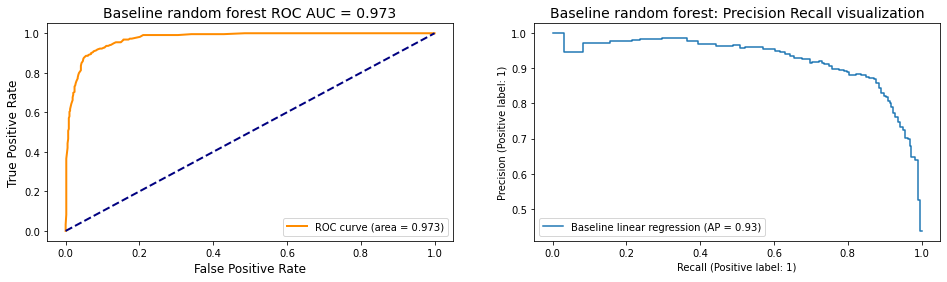

In [47]:
classification_report(y_test=y_test, y_pred=y_pred_rf, y_prob=y_prob_rf, model_name='Baseline random forest')

In [48]:
add_to_metrics(model_name='baseline_rf', y_test=y_test, y_pred=y_pred_rf, y_prob=y_prob_rf)

Baseline вариант случайного леса выдал более сбалансированный результат чем предыдущие модели: precision и recall не опустились ниже 0.8 ни в целом по всей модели ни по отдельным классам. Слабое место модели – полнота предсказаний по первому классу.

**Подбор гиперпараметров**

In [49]:
# param_grid = {
    # 'criterion': ['gini', 'entropy'],
    # 'max_depth': list(range(4, 15)),
    # 'max_features': list(range(2, X_train.shape[1]+1)),
    # 'n_estimators': [30, 100, 500, 1000]
# }

# rf = RandomForestClassifier(class_weight='balanced', oob_score=True, n_jobs=-1, random_state=RAND)
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RAND)
# grid_cv = GridSearchCV(estimator=rf,
                       # param_grid=param_grid,
                       # scoring='roc_auc',
                       # cv=cv,
                       # n_jobs=-1,
                       # verbose=3)

In [50]:
# %%time
# grid_cv.fit(X_train, y_train)

In [51]:
# print(grid_cv.best_score_)
# print(grid_cv.best_params_)

In [52]:
best_params = {'criterion': 'entropy', 'max_depth': 14, 'max_features': 7, 'n_estimators': 500}

In [53]:
rf_grid = RandomForestClassifier(**best_params, class_weight='balanced', oob_score=True, n_jobs=-1, random_state=RAND)
rf_grid.fit(X_train, y_train)
y_pred_rf_grid = rf_grid.predict(X_test)
y_prob_rf_grid = rf_grid.predict_proba(X_test)[:,1]

Grid random forest:
Accuracy: 0.934
Precision: 0.899
Recall: 0.854
F1_score: 0.876
ROC_AUC_score: 0.977

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       581
           1       0.90      0.85      0.88       219

    accuracy                           0.93       800
   macro avg       0.92      0.91      0.92       800
weighted avg       0.93      0.93      0.93       800



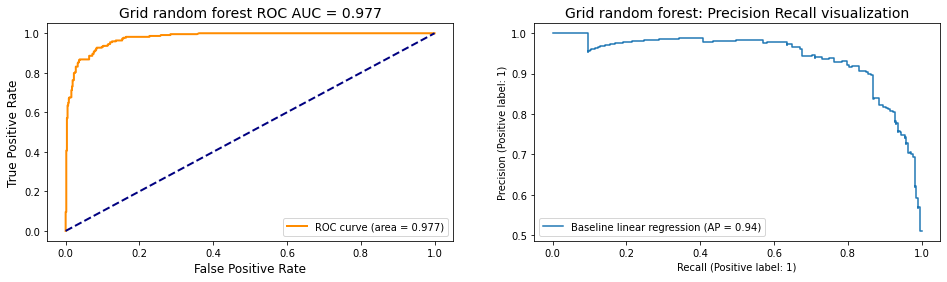

In [54]:
classification_report(y_test=y_test, y_pred=y_pred_rf_grid, y_prob=y_prob_rf_grid, model_name='Grid random forest')

In [55]:
add_to_metrics(model_name='grid_rf', y_test=y_test, y_pred=y_pred_rf_grid, y_prob=y_prob_rf_grid)

Подбор гиперпараметров принес свой результат – нам удалось повысить precision, recall и f1, однако recall по позитивному классу все еще остается недостаточно высоким.

### Gradient Boosting

**Baseline**

In [56]:
gb = GradientBoostingClassifier(random_state=RAND)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

Baseline Gradient Boosting:
Accuracy: 0.934
Precision: 0.919
Recall: 0.831
F1_score: 0.873
ROC_AUC_score: 0.977

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       581
           1       0.92      0.83      0.87       219

    accuracy                           0.93       800
   macro avg       0.93      0.90      0.91       800
weighted avg       0.93      0.93      0.93       800



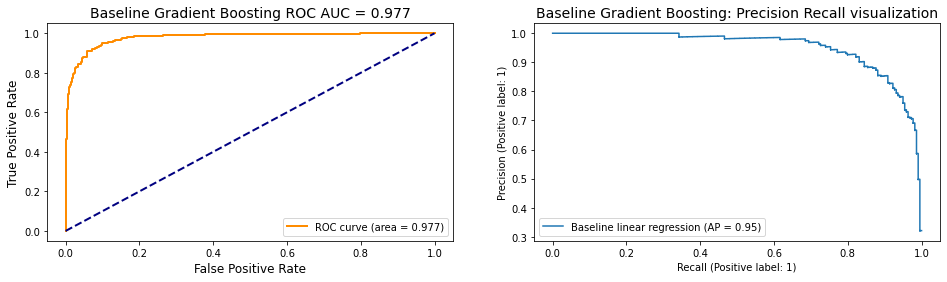

In [57]:
classification_report(y_test=y_test, y_pred=y_pred_gb, y_prob=y_prob_gb, model_name='Baseline Gradient Boosting')

In [58]:
add_to_metrics(model_name='baseline_gb', y_test=y_test, y_pred=y_pred_gb, y_prob=y_prob_gb)

Градиентный бустинг без подбора гиперпараметров выдал метрику f1, сопоставимую с улучшенными версиями логистической регрессии и случайного леса. Слабая сторона модели – полнота определения позитивного класса.

**Подбор гиперпараметров**

In [59]:
# param_grid = {
    # 'learning_rate': [0.01, 0.25, 0.05, 0.1, 0.2, 0.5],
    # 'n_estimators': [30, 100, 500, 1000],
    # 'max_features': [5, 7, 9, 11, 13]
# }

# gb = GradientBoostingClassifier(random_state=RAND)
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RAND)
# grid_cv = GridSearchCV(estimator=gb,
                       # param_grid=param_grid,
                       # scoring='roc_auc',
                       # cv=cv,
                       # n_jobs=-1,
                       # verbose=3)

In [60]:
# %%time
# grid_cv.fit(X_train, y_train)

In [61]:
# print(grid_cv.best_score_)
# print(grid_cv.best_params_)

In [62]:
best_params = {'learning_rate': 0.5, 'max_features': 7, 'n_estimators': 500}

Поскольку мы имеем дело с несбалансированными классами, попробуем снизить вес нулевого класса придав больший вес позитивному классу.

In [63]:
# Рассчитаем доли классов в тренировочной выборке.
count = list(y_train.value_counts())
val = [0, 1]
for i in range(len(count)):
    share = count[i] / len(y_train)
    print(f"{val[i]} класс: {share}")

0 класс: 0.736875
1 класс: 0.263125


In [64]:
sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = 0.263125
sample_weights[y_train == 1] = 0.736875

In [65]:
gb_grid = GradientBoostingClassifier(**best_params, random_state=RAND)
gb_grid.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_gb_grid = gb_grid.predict(X_test)
y_prob_gb_grid = gb_grid.predict_proba(X_test)[:,1]

Grid gradient boosting:
Accuracy: 0.944
Precision: 0.914
Recall: 0.877
F1_score: 0.895
ROC_AUC_score: 0.982

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       581
           1       0.91      0.88      0.90       219

    accuracy                           0.94       800
   macro avg       0.93      0.92      0.93       800
weighted avg       0.94      0.94      0.94       800



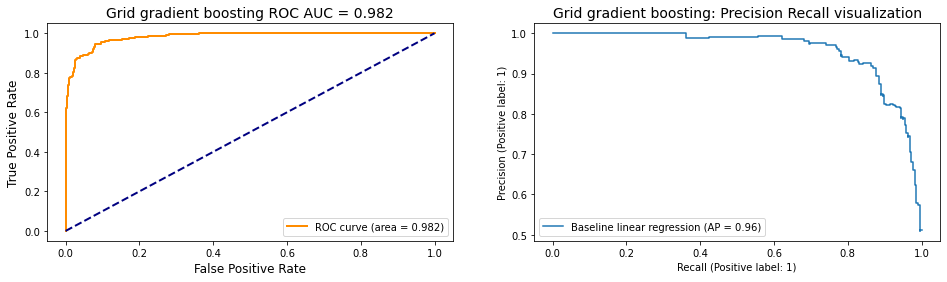

In [66]:
classification_report(y_test=y_test, y_pred=y_pred_gb_grid, y_prob=y_prob_gb_grid, model_name='Grid gradient boosting')

In [67]:
add_to_metrics(model_name='grid_gb', y_test=y_test, y_pred=y_pred_gb_grid, y_prob=y_prob_gb_grid)

В результате подбора гиперпараметров и изменения весов классов нам удалось повысить метрики качества модели градиентного бустинга. Вместе с тем, precision и recall первого класса все еще меньше чем у нулевого класса.

### Выбор лучшей модели

In [68]:
metrics.round(3).style.highlight_max(color = 'lightgreen', axis = 1)

Анализ метрик качества по всем построенным моделям показывает, что лучшей моделью по метрике f1 является улучшенный градиентный бустинг. В то же время модель имеет не самый высокий показатель полноты – лучший результат продемонстрировала улучшенная версия логистической регрессии, однако у последней низкое значение метрики precision. Кроме того, у улучшенной версии градиентного бустинга наиболее высокое значение метрики ROC AUC.

### Анализ важности признаков

Изучим важность признаком в построенной модели градиентного бустинга.

In [69]:
grid_gb_features = pd.DataFrame(list(gb_grid.feature_importances_), list(X_train.columns)).reset_index()
grid_gb_features.columns = ['feature', 'importance']
grid_gb_features = grid_gb_features.sort_values(by='importance', ascending=False)
grid_gb_features

feature  importance
10                           lifetime       0.486
12  avg_class_frequency_current_month       0.170
7                                 age       0.094
5                     contract_period       0.088
11          avg_class_frequency_total       0.083
9               month_to_end_contract       0.036
8        avg_additional_charges_total       0.030
6                        group_visits       0.009
3                       promo_friends       0.002
1                       near_location       0.001
4                               phone       0.001
0                              gender       0.000
2                             partner       0.000

In [70]:
fig = go.Figure(data=[
    go.Bar(x=grid_gb_features.sort_values(by='importance')['importance'].round(3),
           y=grid_gb_features.sort_values(by='importance')['feature'],
           hovertemplate='%{y}: %{x}',
           name='importance',
           orientation='h')])

fig.update_layout(title_text='Важность признаков улучшенной модели градиентного бустинга',
                  width=900, height=500)
fig.show()

In [71]:
print('Суммарная важность 5 признаков с наибольшим влиянием: {:.2f}'.format(grid_gb_features.iloc[:5, 1].sum()))

Суммарная важность 5 признаков с наибольшим влиянием: 0.92


In [72]:
subplot_titles = ['Lifetime, месяцы', 'Cредняя частота посещений<br>в неделю за текущий месяц, ед.',
                  'Возраст, лет', 'Длительность текущего абонемента, месяцы',
                  'Cредняя частота посещений<br>в неделю за весь период, ед.']

fig = make_subplots(rows=3, cols=2, subplot_titles=subplot_titles)

left_col = ['lifetime', 'age', 'avg_class_frequency_total']
right_col = ['avg_class_frequency_current_month', 'contract_period']

def col_plots(col_list, col):
    fig.add_trace(go.Box(y=df.query('churn == 0')[col_list[i]], name='Лояльные', marker_color = 'blue'), row=i+1, col=col)
    fig.add_trace(go.Box(y=df.query('churn == 1')[col_list[i]], name='Ушедшие', marker_color = 'orange'), row=i+1, col=col)
    
for i in range(len(left_col)):
    col_plots(col_list=left_col, col=1)

for i in range(len(right_col)):
    col_plots(col_list=right_col, col=2)

fig.update_layout(showlegend=False, width=1000, height=800,
                  title='Распределение признаков, наиболее сильно виляющих на отток<br>по лояльным и ушедшим клиентам',
                  font=dict(size=13),
                  margin=dict(t=150))
fig.show()

Анализ распределения признаков, наиболее сильно влияющих на отток, показывает, что:
- ушедшие клиенты зачастую пользовались услугами центра на протяжении 1 месяца, а лояльные – на протяжении 4 месяцев,
- ушедшие в отток клиенты в месяц перед уходом в среднем посещали занятия 1 раз в неделю, а лояльные – 2 раза,
- ушедшие клиенты несколько моложе лояльных – их медианный возраст составляет 27 лет (у лояльных – 30 лет),
- в подавляющем большинстве случаев у ушедших клиентов был абонемент на 1 месяц, у лояльных клиентов – медианный срок контракта – 6 месяцев,
- в среднем за все время использования услуг центром лояльные клиенты приходили на занятия 2 раза в неделю, а ушедшие – 1,5 раза. 

### Вывод

В рамках данного этапа мы последовательно обучили 8 моделей бинарной классификации с использованием 4 алгоритмов из библиотеки scikit-learn. В число указанных алгоритмов вошла 1 линейная модель (логистическая регрессия) и 3 основанные на решающих деревьях модели (решающее дерево, случайный лес и градиентный бустинг). Помимо построения baseline моделей мы также осуществили подбор гиперпараметров для улучшения качества построенных моделей. Изначально было принято решение, что сравнение всех моделей будет осуществлено по метрике f1, так как нам важны и precision и recall и мы не можем пренебречь какой-то из этих метрик. Сравнение моделей показало, что лучше всего с задачей предсказания оттока справляется модель градиентного бустинга. 

Из-за несбалансированности данных все модели показали худшие результаты при предсказании позитивного класса, что значительно снижает качество моделей. Поиск оптимального подхода по устранению негативного эффекта несбалансированности классов является ключевым направлением при улучшении построенной модели.

Также вы выяснили, что наиболее важных признаков, по которым модель предсказывает отток, являются:
- lifetime
- средняя частота посещений в неделю за предыдущий месяц
- возраст
- срок абонемента
- средняя частота посещений в неделю за все время с начала действия абонемента.

## Кластеризация клиентов

В рамках данного раздела осуществим кластеризацию клиентов для того, чтобы понять, какие группы образовывают клиенты и как отличается их поведение в зависимости от группы.

Для определения оптимального количества кластеров построим дендрограмму с использованием агломеративной иерархической кластеризации.

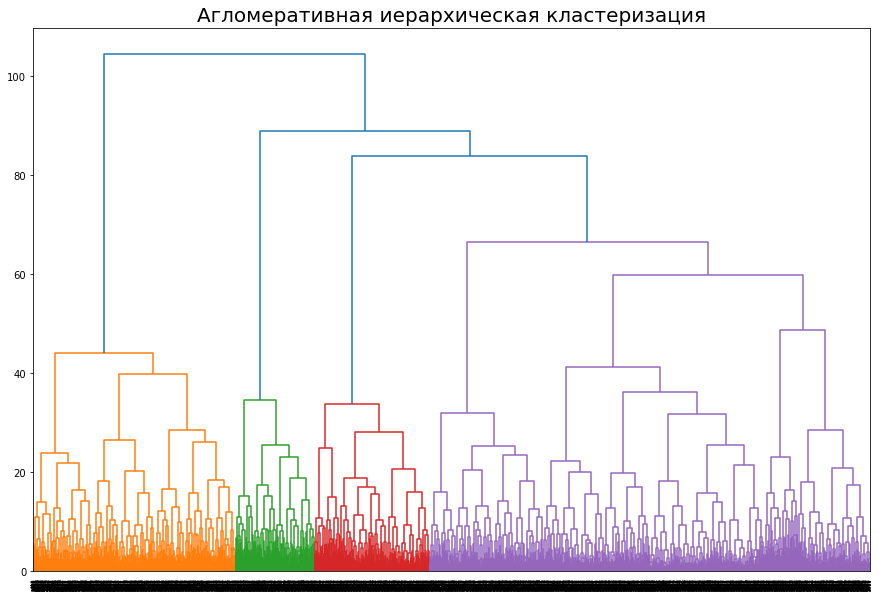

In [73]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  

dendrogram(linked, orientation='top')
plt.title('Aгломеративная иерархическая кластеризация', fontsize=20)
plt.show() 

Видим, что оптимальное количество кластеров равно 4, однако по условию проекта количество кластеров должно составлять 5. Будем использовать это количество кластеров. Будем использовать это количество кластеров при построении модели K-Means для кластеризации клиентов.

In [74]:
km = KMeans(n_clusters=5, random_state=RAND, n_init=1000, max_iter=1000)
labels = km.fit_predict(X_sc)
print('Silhouette score: {:.3f}'.format(silhouette_score(X_sc, labels)))

Silhouette score: 0.141


Согласно [документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette_score#sklearn.metrics.silhouette_score), метрика силуэта может принимать значения от -1 до 1, причем чем ближе 1, тем более качественно работает модель. Значения около 0 указывают на то, что кластеры пересекаются, а приближающиеся к 1 значения указывают на то, что кластеры плотные и хорошо разделены. В нашем случае кластеры пересекаются, что свидетельствует о том, что модель может быть улучшена: возможно следует изменить количество кластеров либо выбрать другой алгоритм. 

Нанесем полученные кластеры на t-SNE представление данных и сравним с группами оттока.

In [75]:
# Для удобства прибавим к номерам кластеров 1 чтобы у нас не было нулевого кластера. 
labels = labels + 1

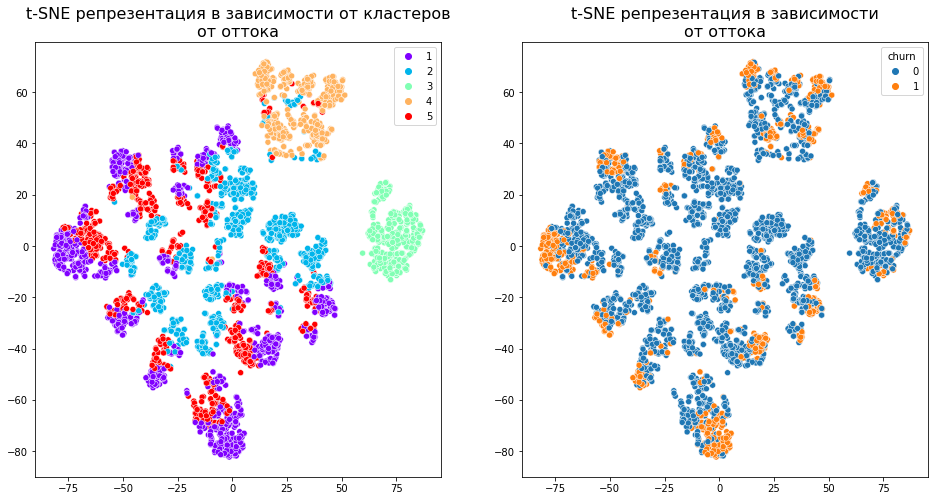

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

sns.scatterplot(tsne_representation[:, 0], tsne_representation[:, 1],
                hue=labels, legend='full', palette='rainbow', ax=ax[0]);
ax[0].set_title(r't-SNE репрезентация в зависимости от кластеров' '\n' r'от оттока', fontsize=16)

sns.scatterplot(tsne_representation[:, 0], tsne_representation[:, 1],
                hue=df['churn'], ax=ax[1]);
ax[1].set_title(r't-SNE репрезентация в зависимости' '\n' r'от оттока', fontsize=16);

In [77]:
# Создадим датафрейм с данными по клиентам для дальнейших преобразований.
clustered_data = X.copy()
clustered_data['cluster'] = labels
clustered_data['churn'] = y
clustered_data['cluster'].value_counts()

1    1249
2    1018
5     842
4     505
3     386
Name: cluster, dtype: int64

Полученные визуализации указывают на то, что, по всей вероятности, вошедшие в 1-й кластер клиенты наименее надежны. Также отметим, что 4 и 3 кластеры достаточно сильно уступают по размеру остальным кластером, при этом на t-SNE представлении они расположены обособленно.

Для того, чтобы проанализировать поведение клиентов центра в зависимости от кластеров нам необходимо рассчитать нужные показатели. Для вещественных показателей мы рассчитаем медиану по кластерам, а по бинарным категориальным признакам – рассчитаем долю позитивного класса по каждому кластеру. Также добавим аналогичные показатели в целом по всем пользователям.

In [78]:
binar_features = ['gender', 'near_location', 'partner',
                  'promo_friends', 'phone', 'group_visits',
                 'churn']

non_binar_features = ['contract_period', 'age',
                      'avg_additional_charges_total','month_to_end_contract', 
                      'lifetime', 'avg_class_frequency_total',
                      'avg_class_frequency_current_month']

clustered_data_info_nonbinar = clustered_data.groupby('cluster', as_index=False)[non_binar_features].median()
clustered_data_info_nonbinar = pd.concat([clustered_data_info_nonbinar, 
                                          pd.DataFrame(clustered_data[non_binar_features].median()).transpose()])\
                                                                                        .reset_index(drop=True)
int_col = ['age', 'contract_period', 'lifetime', 'month_to_end_contract']
for i in int_col:
    clustered_data_info_nonbinar[i] = clustered_data_info_nonbinar[i].astype('int')
    
clustered_data_info_binar = clustered_data.groupby('cluster', as_index=False)[binar_features].mean()
clustered_data_info_binar = pd.concat([clustered_data_info_binar, 
                                          pd.DataFrame(clustered_data[binar_features].mean()).transpose()])\
                                                                                        .reset_index(drop=True)

In [79]:
cluster_report = clustered_data_info_nonbinar.merge(clustered_data_info_binar, on='cluster')
cluster_report.index = cluster_report.index + 1
cols = list(cluster_report.columns)
cols.remove('cluster')
cluster_report = cluster_report.T
cluster_report = cluster_report.rename(columns={6:'all_customers'})
cluster_report.round(2).style.apply(lambda x: ["background: #FA8072" if v < x.iloc[-1] else "" for v in x], axis = 1)

В таблице красным выделены те ячейки, по которым значения меньше чем по всем пользователям. Не во всех случаях это будет значить что-то негативное (например, отток). Для большего удобства построим графики.

In [80]:
cluster_report = cluster_report.T
cluster_report = cluster_report.fillna('total')

In [81]:
def clusters_plots(subplot_titles,
                   left_col,
                   right_col):
    fig = make_subplots(rows=4, cols=2, subplot_titles=subplot_titles)
    
    hovertemplate='Кластер: %{x}, значение: %{y}'
    
    def col_plots(col_list, col):
        fig.add_trace(go.Bar(x=cluster_report.index[:5],
                             y=cluster_report[col_list[i]].round(2),
                             name=col_list[i],
                             hovertemplate=hovertemplate
                            ),
                      row=i+1, col=col
                     )
        fig.add_hline(y=float(cluster_report.query('cluster == "total"')[col_list[i]]),
                      row=i+1, col=col, line_dash='dot')
    
    for i in range(len(left_col)):
        col_plots(col_list=left_col, col=1)

    for i in range(len(right_col)):
        col_plots(col_list=right_col, col=2)

    fig.update_layout(showlegend=False, width=1000, height=700,
                      title='Сведения о клиентах в разрезе кластеров<br>(пунктирная линия - значение показателя по всем клиентам)',
                      font=dict(size=13),
                      margin=dict(t=150))
    fig.show()

In [82]:
subplot_titles = ['Медианный возраст, лет', 'Доля проживающих или работающих<br>на территории района, %',
                  'Доля имеющих контактный телефон, %', 'Доля записавшихся по акции, %',
                  'Доля сотрудников копаний-партнеров, %', 'Доля пола "1", %',
                  'Медианное время с момента<br>первого посещения, месяцев']

left_col = ['age', 'phone', 'partner', 'lifetime']
right_col = ['near_location', 'promo_friends', 'gender']

clusters_plots(subplot_titles=subplot_titles,
               left_col=left_col,
               right_col=right_col)

In [83]:
subplot_titles = ['Медианная длительность текущего<br>абонемента, месяцев', 'Медианный срок до окончания<br>текущего абонемента, месяцев',
                 'Доля посетивших групповые занятия, %', 'Медианная суммарная выручка<br>от других услуг центра, руб.',
                 'Медиана средней частоты посещений<br>в неделю за все время, ед.', 'Медиана средней частоты посещений<br>в неделю за текущий месяц, ед.',
                 'Отток, %']

left_col = ['contract_period', 'group_visits', 'avg_class_frequency_total', 'churn']
right_col = ['month_to_end_contract', 'avg_additional_charges_total', 'avg_class_frequency_current_month']

clusters_plots(subplot_titles=subplot_titles,
               left_col=left_col,
               right_col=right_col)

Черты поведения клиентов **кластера 1**:
- низкие доли записавшихся по акции, пришедших из компаний-партнеров и посетивших групповые занятия
- наименьший lifetime, равняющийся 1 месяцу и преобладание контрактов на 1 месяц
- низкая посещаемость занятий
- выручка от других услуг ниже медианы по всем клиентам
- наиболее высокий показатель оттока (52%)

Черты поведения клиентов **кластера 2**:
- высокие доли записавшихся по акции, пришедших из компаний-партнеров и посетивших групповые занятия
- наиболее высокий lifetime, равняющийся 4 месяцам и преобладание контрактов на 12 месяц
- посещаемость занятий чуть выше медианной (2 раза в неделю) 
- выручка от других услуг выше медианной
- наименьший показатель оттока (3%)

Черты поведения клиентов **кластера 3**:
- отсутствие контактных телефонов
- все показатели находятся на медиане по всем клиентам 

Черты поведения клиентов **кластера 4**:
- не проживают и не работают на территории района, в котором расположен центр
- низкий lifetime (2 месяца)
- преобладают контракты на 1 месяц
- реже всех посещают групповые занятия
- высокий отток (44%)

Черты поведения клиентов **кластера 5**:
- невысокие доли записавшихся по акции и пришедших из компаний-партнеров, но высокая доля посетивших групповые занятия
- наиболее высокий lifetime, равняющийся 4 месяцам, но наблюдается преобладание контрактов на 1 месяц
- самая высокая посещаемость занятий (2.7 раза в неделю) 
- выручка от других услуг выше медианной
- низкий показатель оттока (7%)

Обобщая полученные результаты, аудиторию центра можно разделить на 4 условные группы:
1. целевая аудитория, пришедшая из компаний-партнеров и проживающая (работающая) на территории района:
    - заключают долгосрочные договора
    - регулярно ходят в спортивный зал,
    - посещают групповые занятия,
    - редко уходят в отток
    - кластер 2
2. целевая аудитория, не пришедшая из компаний-партнеров и проживающая (работающая) на территории района: 
    - заключают краткосрочные договора,
    - регулярно ходят в спортивный зал,
    - посещают групповые занятия,
    - редко уходят в отток
    - кластер 5
3. нецелевая аудитория, не пришедшая из компаний-партнеров и проживающая (работающая) на территории района:
     - заключают краткосрочные договора
     - редко ходят в спортивный зал
     - редко посещают групповые занятия
     - часто уходят в отток
     - кластер 1
4. нецелевая аудитория, проживающая (работающая) за пределами района: 
    - заключают краткосрочные договора
    - редко ходят в спортивный зал
    - редко посещают групповые занятия
    - часто уходят в отток
    - кластер 4

Кластер 3 не образовывает самостоятельной группы, т.к. этот кластер выделен, по всей видимости, только лишь на основании того, что у этих клиентов не указан контактный телефон.

### Вывод

С использованием кластеризации данных о клиентах центра и их поведении нам удалось выделить 4 группы пользователей.

В **первую группу** входят клиенты, проживающие (работающие) на территории района, в котором расположен центр, и пришедшие из компаний-партнеров. Это лояльные клиенты, которые активно пользуются услугами центра и заключают долгосрочные договора.

**Вторую группу** также образовывают лояльные клиенты, проживающие (работающие) на территории района, но которые пришли самостоятельно (не через компании-клиенты). Помимо этого, от первой группы их отличает то, что они заключают краткосрочные договора.

В **третью группу** вошли клиенты, пришедшие самостоятельно и проживающие (работающие) на территории района. В отличие от второй группы, такие клиенты не проявляют высокой активности и чаще других уходят в отток. Возможно это просто нецелевая аудитория.

**Четвертую группу** образуют клиенты, не проживающие (работающие) на территории района. Для них также характерна низкая активность высокий отток. Возможная причина – отсутствие друзей и знакомых на занятиях, т.к. для пользователей этой группы характерны самые низкие доли посетивших групповые занятия и пришедших по акции «приведи друга». 

## Выводы и предложения по удержанию клиентов

**Выводы**

В рамках данного проекта мы получили информацию, на основе которой можем сформулировать предложения по уменьшению оттока клиентов фитнес-центра. Прежде чем озвучить указанные предложения вспомним основные выводы по каждому из этапов проекта.

Во-первых, данные поступили нам в хорошем состоянии и не потребовали серьезной предобработки, что очень сильно упростило нам решение последующих задач.

Во-вторых, разведочный анализ данных показал, что значения практически всех показателей выше у лояльных пользователей. Также оказалось, что программы по привлечению клиентов через акцию и компании-партнеры приносят свои результаты.

В-третьих, мы построили 8 моделей машинного обучения на основе 4 алгоритмов, 3 из которых используют решающие деревья. На основе сравнения метрик качества мы выбрали градиентный бустинг как модель, наиболее точно и полно и предсказывающую отток клиентов. Анализ важности признаков показал, что наибольшее значение при предсказании оттока имеет lifetime и активность клиента в текущем месяце.

В-четвертых, с использованием кластеризации клиентов мы выделили 4 группы клиентов. Мы выяснили, что более всего подвержены оттоку:
- новые клиенты, 
- клиенты, не проживающие в районе фитнес-центра,
- клиенты, посещающие зал 1 раз в неделю.

В свою очередь для лояльных клиентов характерно:
- заключение долгосрочных договоров
- проживание в районе фитнес-центра
- работа в компаниях-партнерах
- высокая активность (посещение зала 2 раза в неделю и посещение групповых занятий).

**Предложения по удержанию клиентов**

На основе полученных данных для уменьшения оттока клиентов предлагаются следующие меры.

Рекомендуется сконцентрировать усилия на удержании новых пользователей, в особенности тех, кто не проживает или работает не территории района, в котором расположен центр. Таким клиентам можно, например, предоставить возможность пользоваться бесплатно услугами ментора на протяжении нескольких первых месяцев. Также можно стимулировать новых клиентов посещать групповые занятия, чтобы они социализировались. Важно проводить работу по созданию дружелюбного комьюнити.

Предлагается выстроить стратегию удержания пользователей вокруг повышения конверсии в целевые действия. В нашем случае целевыми действиями могут выступать посещение спортивного зала два раза в неделю вместо одного, посещение групповых занятий, заключение контракта на 6 и 12 месяцев. Для повышения конверсии в целевые действия можно, например, предоставлять скидки либо давать бонусы новым пользователям или давать возможность бесплатно пользоваться определенными услугами центра. Также можно разработать программу лояльности. 

Для выявления клиентов, которые потенциально прекратят пользоваться услугами центра в следующем месяце, можно использовать построенную модель машинного обучения на основе алгоритма градиентного бустинга. Указанным клиентам также можно предлагать скидки и бонусы, а также услуги ментора. 